<a href="https://colab.research.google.com/github/am28012/atharvamore_github.io/blob/main/Zudio_Customer_Purchase_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import pearsonr

In [48]:
df = pd.read_csv('/content/Zudio sales_new.csv')

In [47]:
print(df.shape)
print(df.info())
print(df.head())



(7899, 28)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7899 entries, 0 to 7898
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      7899 non-null   object 
 1   Country                    7899 non-null   object 
 2   State                      7899 non-null   object 
 3   City                       7899 non-null   object 
 4   Category                   7899 non-null   object 
 5   Clothing Type              7899 non-null   object 
 6   Store Number               7899 non-null   int64  
 7   Postal Code                7899 non-null   int64  
 8   Store Type                 7899 non-null   object 
 9   Store Open Date            7899 non-null   object 
 10  Selling Area Size (sq ft)  7899 non-null   int64  
 11  Store Manager              7899 non-null   object 
 12  Manager ID                 7899 non-null   object 
 13  Store Address              7899 non-n

In [ ]:
print(df.isnull().sum())

Store                           0
Country                         0
State                           0
City                            0
Category                        0
Clothing Type                   0
Store Number                    0
Postal Code                     0
Store Type                      0
Store Open Date                 0
Selling Area Size (sq ft)       0
Store Manager                   0
Manager ID                      0
Store Address                   0
Operating Hours                 0
Staff Count                     0
Parking Availability            0
Security Features            2038
Order ID                        0
Order Date                      0
Month                           0
Customer ID                     0
Customer Name                   0
Product ID                      0
Price                           0
Quantity                        0
Sales Profit                    0
dtype: int64


In [50]:
#Doing Some Feature Engineering
threshold = 5
df['Large_Purchase'] = np.where(df['Quantity'] >= threshold, 1, 0)
print(df['Large_Purchase'].value_counts(normalize=True))

Large_Purchase
1    0.503102
0    0.496898
Name: proportion, dtype: float64


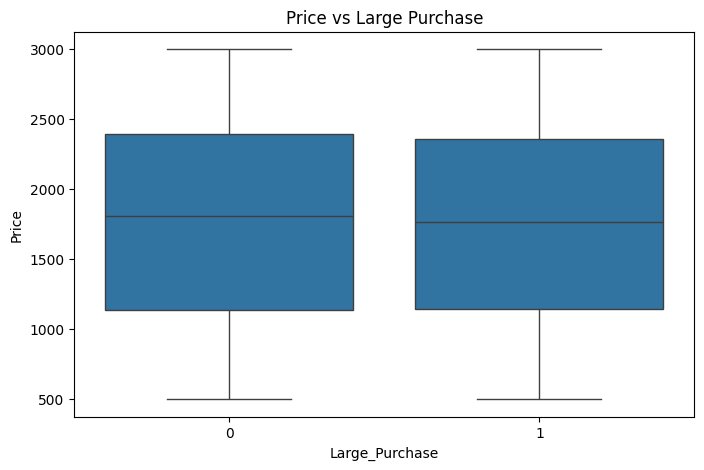

In [51]:
#Price Distribution vs Large Purchase
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Large_Purchase', y='Price')
plt.title("Price vs Large Purchase")
plt.show()

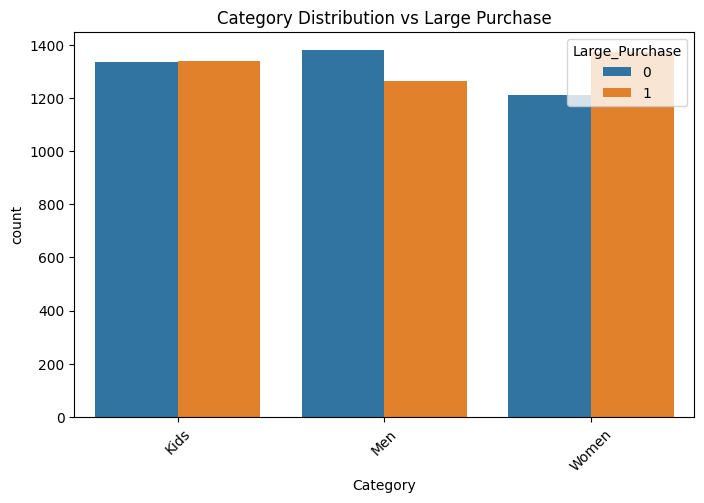

In [40]:
#Count Of Category v large Purchase
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Category', hue='Large_Purchase', order=df['Category'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Category Distribution vs Large Purchase")
plt.show()

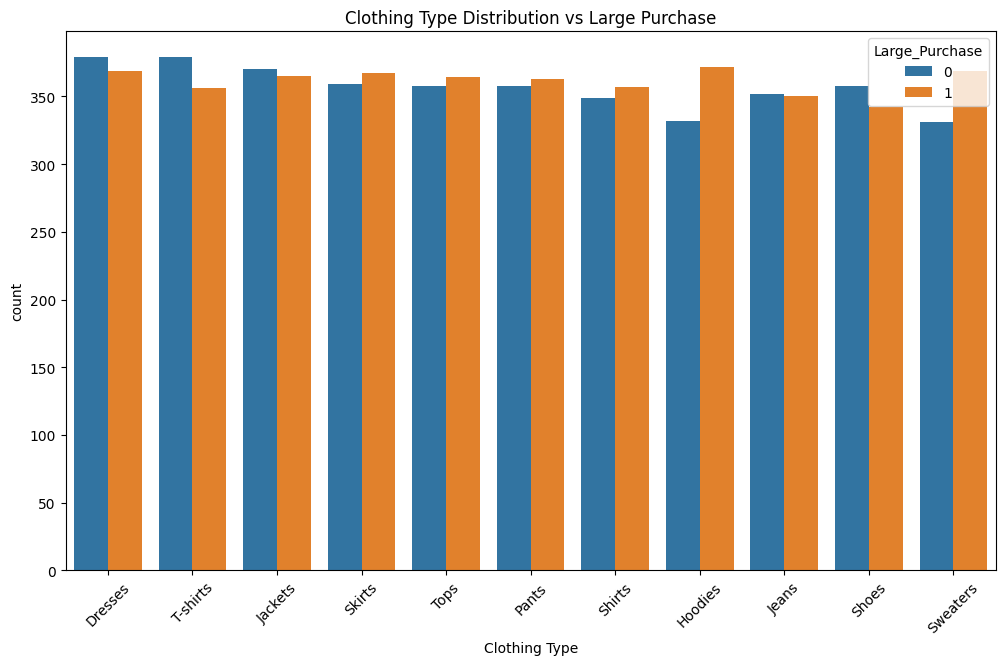

In [44]:
#Count of Clothing Type v large Purchase
plt.figure(figsize=(12, 7))
sns.countplot(data=df, x='Clothing Type', hue='Large_Purchase', order=df['Clothing Type'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Clothing Type Distribution vs Large Purchase")
plt.show()

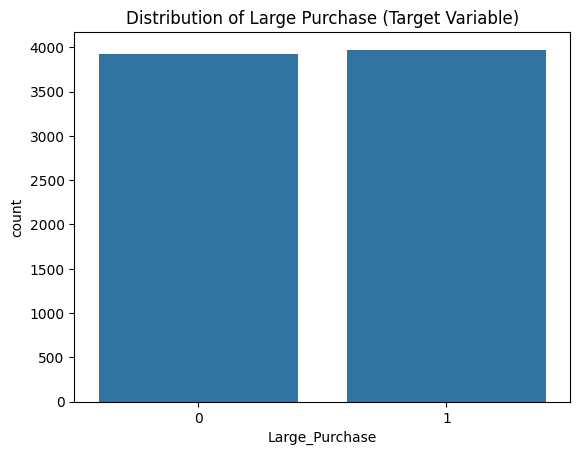

In [53]:
sns.countplot(x='Large_Purchase', data=df)
plt.title("Distribution of Large Purchase (Target Variable)")
plt.show()

In [56]:
#Pearson R test
numerical_cols = df.select_dtypes(include=np.number).columns
numerical_cols = numerical_cols.drop('Large_Purchase')
correlations = {}
for col in numerical_cols:
  if col != 'Quantity':
    corr, _ = pearsonr(df[col], df['Large_Purchase'])
    correlations[col] = corr

print("Pearson correlation with Quantity:")
for col, corr in correlations.items():
    print(f"{col}: {corr:.4f}")

Pearson correlation with Quantity:
Store Number: 0.0006
Postal Code: -0.0130
Selling Area Size (sq ft): -0.0196
Staff Count: 0.0201
Order ID: 0.0058
Customer ID: -0.0140
Product ID: -0.0080
Price: -0.0122
Sales Profit: 0.6485


In [58]:
#Chi Sqaure test
categorical_cols = df.select_dtypes(include='object').columns

# P Chi-square test for each categorical column vs Large_Purchase
print("Chi-square test results with Large_Purchase:")
for col in categorical_cols:
    print(f"\n{col}:")
    contingency_table = pd.crosstab(df[col], df['Large_Purchase'])
    chi2, p, dof, expected = scipy.stats.chi2_contingency(contingency_table)
    print(f"  Chi-square statistic: {chi2:.4f}")
    print(f"  P-value: {p:.4f}")
    print(f"  Degrees of freedom: {dof}")

Chi-square test results with Large_Purchase:

Store:
  Chi-square statistic: 0.0000
  P-value: 1.0000
  Degrees of freedom: 0

Country:
  Chi-square statistic: 0.0000
  P-value: 1.0000
  Degrees of freedom: 0

State:
  Chi-square statistic: 8.0698
  P-value: 0.3265
  Degrees of freedom: 7

City:
  Chi-square statistic: 47.4956
  P-value: 0.2250
  Degrees of freedom: 41

Category:
  Chi-square statistic: 14.7390
  P-value: 0.0006
  Degrees of freedom: 2

Clothing Type:
  Chi-square statistic: 5.5540
  P-value: 0.8512
  Degrees of freedom: 10

Store Type:
  Chi-square statistic: 1.5685
  P-value: 0.2104
  Degrees of freedom: 1

Store Open Date:
  Chi-square statistic: 1709.9751
  P-value: 0.8554
  Degrees of freedom: 1773

Store Manager:
  Chi-square statistic: 7470.9835
  P-value: 0.5109
  Degrees of freedom: 7475

Manager ID:
  Chi-square statistic: 131.4880
  P-value: 0.0161
  Degrees of freedom: 99

Store Address:
  Chi-square statistic: 7899.0000
  P-value: 0.4947
  Degrees of freed

In [61]:
#anova analysis
# numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
numerical_cols.remove('Large_Purchase')

# ANOVA test for each numerical column vs Large_Purchase
print("ANOVA test results with Large_Purchase:")
for col in numerical_cols:
    print(f"\n{col}:")
    # Create groups based on 'Large_Purchase'
    group0 = df[df['Large_Purchase'] == 0][col]
    group1 = df[df['Large_Purchase'] == 1][col]

    # Perform ANOVA test
    f_statistic, p_value = scipy.stats.f_oneway(group0, group1)

    print(f"  F-statistic: {f_statistic:.4f}")
    print(f"  P-value: {p_value:.4f}")

ANOVA test results with Large_Purchase:

Store Number:
  F-statistic: 0.0028
  P-value: 0.9579

Postal Code:
  F-statistic: 1.3322
  P-value: 0.2484

Selling Area Size (sq ft):
  F-statistic: 3.0302
  P-value: 0.0818

Staff Count:
  F-statistic: 3.2039
  P-value: 0.0735

Order ID:
  F-statistic: 0.2685
  P-value: 0.6043

Customer ID:
  F-statistic: 1.5495
  P-value: 0.2132

Product ID:
  F-statistic: 0.5039
  P-value: 0.4778

Price:
  F-statistic: 1.1793
  P-value: 0.2775

Quantity:
  F-statistic: 24838.3406
  P-value: 0.0000

Sales Profit:
  F-statistic: 5732.5802
  P-value: 0.0000


In [62]:
#Logistic Regression Model
df_model = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
display(df_model.head())

,Store Number,Postal Code,Selling Area Size (sq ft),Staff Count,Order ID,Customer ID,Product ID,Price,Quantity,Sales Profit,...,Customer Name_Zachary Miles,Customer Name_Zachary Moore,Customer Name_Zachary Morgan,Customer Name_Zachary Navarro,Customer Name_Zachary Newman,Customer Name_Zachary Robinson,Customer Name_Zachary Sanchez,Customer Name_Zoe Hudson,Customer Name_Zoe Rodriguez,Customer Name_Zoe Sanchez
0,30,411084,950,17.0,88240,233084,354,1958.0,5.0,3916.0,...,False,False,False,False,False,False,False,False,False,False
1,48,404562,1200,6.0,78145,926472,741,2078.0,1.0,831.2,...,False,False,False,False,False,False,False,False,False,False
2,97,437773,1100,18.0,33363,853255,607,1445.0,2.0,1156.0,...,False,False,False,False,False,False,False,False,False,False
3,93,431725,1400,13.0,46682,106146,991,2469.0,6.0,5925.6,...,False,False,False,False,False,False,False,False,False,False
4,51,415370,1400,19.0,58242,264070,479,1105.0,6.0,2652.0,...,False,False,False,False,False,False,False,False,False,False


In [65]:
from sklearn.model_selection import train_test_split
X = df_model.drop('Large_Purchase' , axis=1)
y = df_model['Large_Purchase']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (6319, 25168)
Testing set shape: (1580, 25168)


In [66]:
from sklearn.preprocessing import StandardScaler
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
numerical_cols.remove('Large_Purchase')
numerical_cols.remove('Quantity')
numerical_cols.remove('Sales Profit')

scaler = StandardScaler()

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

print("Scaled Training data head:")
display(X_train.head())

print("\nScaled Testing data head:")
display(X_test.head())

Scaled Training data head:


,Store Number,Postal Code,Selling Area Size (sq ft),Staff Count,Order ID,Customer ID,Product ID,Price,Quantity,Sales Profit,...,Customer Name_Zachary Miles,Customer Name_Zachary Moore,Customer Name_Zachary Morgan,Customer Name_Zachary Navarro,Customer Name_Zachary Newman,Customer Name_Zachary Robinson,Customer Name_Zachary Sanchez,Customer Name_Zoe Hudson,Customer Name_Zoe Rodriguez,Customer Name_Zoe Sanchez
7779,-0.027340,-0.306731,-0.064239,0.861742,-0.192131,0.102907,0.641859,-1.377151,7.0,2161.6,...,False,False,False,False,False,False,False,False,False,False
7741,0.761511,-1.700545,0.974605,1.631974,0.719830,1.087413,-1.472639,0.201431,3.0,2282.4,...,False,False,False,False,False,False,False,False,False,False
196,-1.536445,-1.473073,1.494027,-1.641512,-1.469725,-0.751653,-0.367922,-0.921737,5.0,2196.0,...,False,False,False,False,False,False,False,False,False,False
4483,-1.399254,0.359665,0.455183,1.246858,-1.633948,-0.045348,0.706588,-0.386696,6.0,3554.4,...,False,False,False,False,False,False,False,False,False,False
3539,0.315639,0.670746,-0.843373,-1.256396,0.102829,0.846134,-1.468324,0.746251,6.0,5500.8,...,False,False,False,False,False,False,False,False,False,False



Scaled Testing data head:


,Store Number,Postal Code,Selling Area Size (sq ft),Staff Count,Order ID,Customer ID,Product ID,Price,Quantity,Sales Profit,...,Customer Name_Zachary Miles,Customer Name_Zachary Moore,Customer Name_Zachary Morgan,Customer Name_Zachary Navarro,Customer Name_Zachary Newman,Customer Name_Zachary Robinson,Customer Name_Zachary Sanchez,Customer Name_Zoe Hudson,Customer Name_Zoe Rodriguez,Customer Name_Zoe Sanchez
7762,1.687553,-1.495402,-0.064239,0.861742,0.983350,-1.182570,1.487658,-0.524996,6.0,3316.8,...,False,False,False,False,False,False,False,False,False,False
533,-1.570743,-0.580738,-0.064239,-1.641512,-0.107801,-1.072535,0.426093,-0.599036,4.0,2126.4,...,False,False,False,False,False,False,False,False,False,False
2673,-1.399254,0.853815,-0.064239,-0.486164,-1.330578,-1.163422,-1.360441,0.584202,8.0,6963.2,...,False,False,False,False,False,False,False,False,False,False
1669,-0.919084,-1.275600,1.494027,1.439416,-1.018335,-1.622599,0.685012,1.556497,1.0,1148.8,...,False,False,False,False,False,False,False,False,False,False
3442,-0.884786,-1.501112,-0.843373,-1.448954,-0.031573,-0.183054,0.685012,1.161153,1.0,1035.6,...,False,False,False,False,False,False,False,False,False,False


In [68]:
from sklearn.linear_model import LogisticRegression

# Building and training the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

print("Logistic Regression Model trained successfully!")

Logistic Regression Model trained successfully!


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [76]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluation of  the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9785
Precision: 0.9751
Recall: 0.9825
F1-score: 0.9788

Confusion Matrix:
[[762  20]
 [ 14 784]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       782
           1       0.98      0.98      0.98       798

    accuracy                           0.98      1580
   macro avg       0.98      0.98      0.98      1580
weighted avg       0.98      0.98      0.98      1580



In [81]:
import re
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Function to clean column names
def clean_col_names(df):
    cols = df.columns
    new_cols = []
    for col in cols:
        new_col = re.sub(r'[<>]', '_', col)
        new_col = re.sub(r'\s+', '_', new_col)
        new_col = re.sub(r'[^\w_]', '', new_col)
        new_cols.append(new_col)
    df.columns = new_cols
    return df

X_train_cleaned = clean_col_names(X_train.copy())
X_test_cleaned = clean_col_names(X_test.copy())

print(f"LightGbm")

# Building and training the LightGBM model with cleaned data
lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train_cleaned, y_train)

y_pred_lgbm = lgbm.predict(X_test_cleaned)

# Evaluate the model
print("LightGBM Classification Report:")
print(classification_report(y_test, y_pred_lgbm))
print("\nLightGBM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lgbm))

LightGbm
[LightGBM] [Info] Number of positive: 3176, number of negative: 3143
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000443 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2292
[LightGBM] [Info] Number of data points in the train set: 6319, number of used features: 323
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502611 -> initscore=0.010445
[LightGBM] [Info] Start training from score 0.010445
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

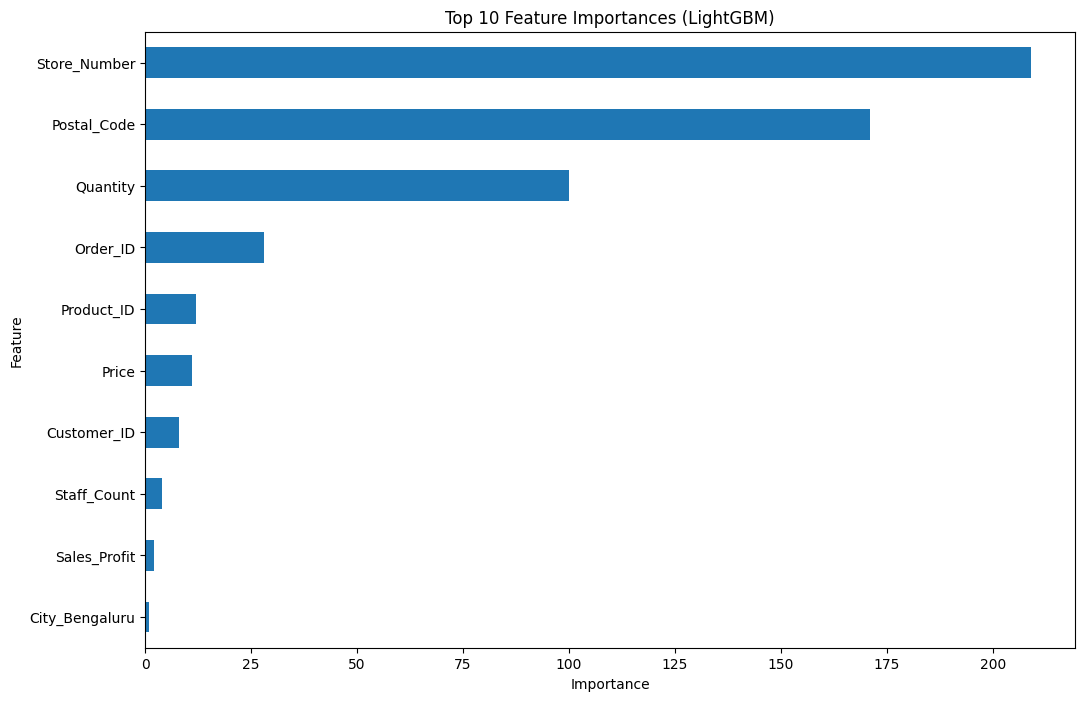

In [86]:
feature_importances = lgbm.feature_importances_
feature_importance_series = pd.Series(feature_importances, index=X_train_cleaned.columns)
sorted_feature_importances = feature_importance_series.sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sorted_feature_importances.head(10).plot(kind='barh')
plt.title('Top 10 Feature Importances (LightGBM)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()